# Portafolio con codigos neftali

## 01 Introduction

In [1]:
import sys
print(sys.version)

3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [2]:
import lseg.data as ld
ld.open_session()

<lseg.data.session.Definition object at 0x225b8c54b90 {name='workspace'}>

In [4]:
data = ld.get_data(['JPM','RY.TO','8058.T','BA','LMT',
    'NVDA','MSFT.O','SAND.K','VLO'], ['TR.CommonName',"TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])
data

,Instrument,Company Common Name,Price Close,Volume,Price Low,YTD Total Return
0,JPM,JPMorgan Chase & Co,292.91,7883326,291.44,24.230232
1,RY.TO,Royal Bank of Canada,199.77,2435616,199.35,18.287094
2,8058.T,Mitsubishi Corp,3497.0,8010200,3441.0,36.748484
3,BA,Boeing Co,230.95,5906644,228.09,30.480226
4,LMT,Lockheed Martin Corp,459.11,1471451,452.765,-3.47666
5,NVDA,NVIDIA Corp,667200.0,1334,666500.0,10.298216
6,MSFT.O,Microsoft Corp,498.2,16659412,495.03,18.844903
7,SAND.K,Sandstorm Gold Ltd,11.59,3377882,11.5,108.898253
8,VLO,Valero Energy Corp,157.36,2453041,153.62,31.614508


In [5]:
dax = data
dax.set_index('Instrument')['YTD Total Return']

Instrument
JPM        24.230232
RY.TO      18.287094
8058.T     36.748484
BA         30.480226
LMT         -3.47666
NVDA       10.298216
MSFT.O     18.844903
SAND.K    108.898253
VLO        31.614508
Name: YTD Total Return, dtype: Float64

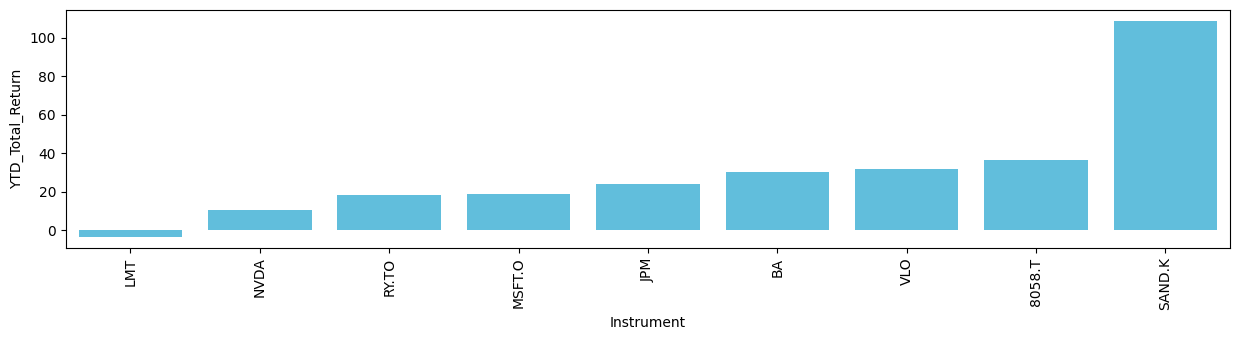

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]
plt.rcParams["figure.figsize"] = [12.50, 3.50]
plt.rcParams["figure.autolayout"] = True

dax2 = dax.set_index('Instrument')['YTD Total Return'].sort_values().to_frame()
dax2.columns = [c.replace(' ', '_') for c in dax2.columns]

bar_plot = sns.barplot(x=dax2.index, y=dax2['YTD_Total_Return'], color="#4CC9F0")
plt.xticks(rotation=90)
plt.show()

In [8]:
portfolio = dax['Instrument'][0:10].tolist()
portfolio

['JPM', 'RY.TO', '8058.T', 'BA', 'LMT', 'NVDA', 'MSFT.O', 'SAND.K', 'VLO']

In [10]:
import datetime as dt
today = dt.date.today()
delta_day = today - dt.timedelta(days=100)
print(today, delta_day)

2025-09-08 2025-05-31


In [11]:
df_ts = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")

prices = df_ts.rename(columns={'Price Close': portfolio[0]})
prices

JPM,JPM
Date,
2025-06-02,264.66
2025-06-03,266.27
2025-06-04,264.22
2025-06-05,261.95
2025-06-06,265.73
...,...
2025-09-02,299.7
2025-09-03,299.51
2025-09-04,303.82


In [12]:
for i in portfolio[1:]:
    print(i)
    w = ld.get_history([i], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1D")
    w1 = w.rename(columns={'Price Close': i})
    prices = prices.join(w1, lsuffix="_left", rsuffix="_right")

RY.TO
8058.T
BA
LMT
NVDA
MSFT.O
SAND.K
VLO


In [13]:
prices

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO
Date,,,,,,,,,
2025-06-02,264.66,175.16,2904.0,211.47,478.82,<NA>,461.97,9.29,128.3
2025-06-03,266.27,174.93,2865.5,213.43,480.17,580000,462.97,9.36,130.95
2025-06-04,264.22,174.25,2882.0,211.98,482.21,581660,463.87,9.38,126.54
2025-06-05,261.95,173.48,2861.0,209.02,478.03,<NA>,467.68,9.53,126.88
2025-06-06,265.73,174.57,2874.5,210.8,481.69,583000,470.38,9.19,128.35
...,...,...,...,...,...,...,...,...,...
2025-09-02,299.7,199.53,3453.0,237.38,452.5,684980,505.12,11.35,154.28
2025-09-03,299.51,200.97,3359.0,232.38,449.06,676860,505.35,11.23,155.38
2025-09-04,303.82,201.72,3385.0,230.75,456.85,<NA>,507.97,11.22,155.39


In [15]:
import numpy as np

prices = ld.get_history([portfolio[0]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")


prices['Close'] = prices['Price Close'].astype(float)
prices[portfolio[0]] = np.log(prices['Close'].div(prices['Close'].shift(1)))
daily_returns = prices.drop(['Price Close', 'Close'], axis=1)
daily_returns 

JPM,JPM
Date,
2025-06-06,NaN
2025-06-13,-0.002940
2025-06-20,0.037230
2025-06-27,0.043094
2025-07-03,0.030494
2025-07-11,-0.031365
2025-07-18,0.015256
2025-07-25,0.024921
2025-08-01,-0.031466


In [16]:
for instrument in range(1,len(portfolio)):
    print(instrument, portfolio[instrument])
    prices = ld.get_history([portfolio[instrument]], fields = ['TR.PriceClose'],
                          start = delta_day, 
                          end = today, 
                          interval="1W")
    prices['Close'] = prices['Price Close'].astype(float)
    prices[portfolio[instrument]] = np.log(prices['Close'].div(prices['Close'].shift(1)))
    prices = prices.drop(['Price Close', 'Close'], axis=1)
    daily_returns = daily_returns.join(prices)

1 RY.TO
2 8058.T
3 BA
4 LMT
5 NVDA
6 MSFT.O
7 SAND.K
8 VLO


In [17]:
daily_returns

,JPM,RY.TO,8058.T,BA,LMT,NVDA,MSFT.O,SAND.K,VLO
Date,,,,,,,,,
2025-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-06-13,-0.002940,-0.005860,-0.010140,-0.050994,0.009833,0.004450,0.009690,0.016190,0.043899
2025-06-20,0.037230,0.007406,-0.011310,-0.007868,-0.033211,0.003137,0.005124,-0.022741,0.050809
2025-06-27,0.043094,0.016225,0.019186,0.076495,-0.025767,0.091925,0.038100,-0.011013,-0.046493
2025-07-03,0.030494,NaN,NaN,0.006365,0.008533,NaN,0.005830,0.064331,0.070857
2025-07-11,-0.031365,0.004557,-0.008427,0.049337,0.010731,0.048857,0.008941,0.023603,0.056932
2025-07-18,0.015256,0.009765,-0.006585,0.010961,-0.007622,0.045136,0.013283,-0.029853,-0.046131
2025-07-25,0.024921,-0.006444,0.053811,0.016090,-0.096762,0.039110,0.007150,-0.002092,-0.029018
2025-08-01,-0.031466,-0.019473,-0.002309,-0.049069,-0.000380,-0.002226,0.020043,-0.012645,-0.063914


<Axes: >

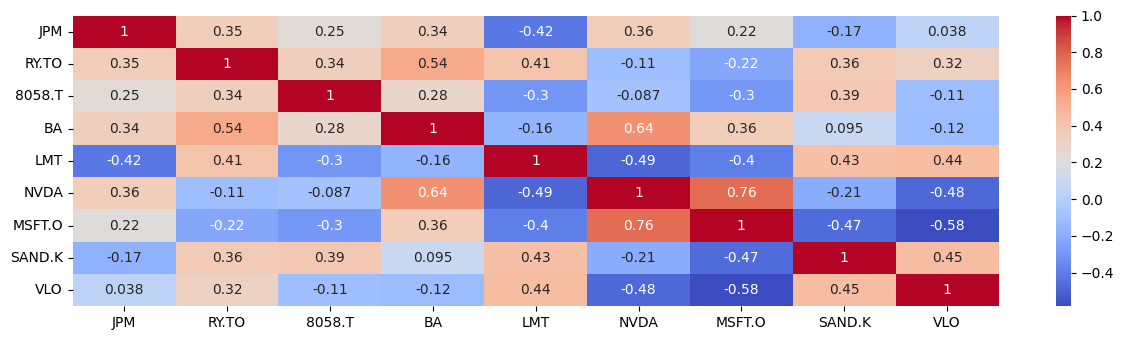

In [ ]:
correlacion = daily_returns.corr()
sns.heatmap(correlacion, annot = True, fmt='.2g',cmap= 'coolwarm')

## 04 Backtesting

In [19]:
from datafromsource import DataFromSource
import talib as ta


In [21]:
aapl = DataFromSource('AAPL.O')
df_aapl = aapl.get_prices()

jpm = DataFromSource('JPM')
df_jpm = jpm.get_prices()

ry = DataFromSource('RY.TO')
df_ry = ry.get_prices()

to = DataFromSource('8058.T')
df_to = to.get_prices()

ba = DataFromSource('BA')
df_ba = ba.get_prices()

lmt = DataFromSource('LMT')
df_lmt = lmt.get_prices()

nvda = DataFromSource('NVDA')
df_nvda = nvda.get_prices()

msft = DataFromSource('MSFT.O')
df_msft = msft.get_prices()

sand = DataFromSource('SAND.K')
df_sand = sand.get_prices()

vlo = DataFromSource('VLO')
df_vlo = vlo.get_prices()


In [23]:
df_vlo

VLO,close
Date,
2024-09-09,134.16
2024-09-10,136.09
2024-09-11,132.90
2024-09-12,134.12
2024-09-13,134.26
...,...
2025-09-02,154.28
2025-09-03,155.38
2025-09-04,155.39


In [22]:
for t in [5, 21, 63]:
    df_nvda[f'SMA_{t}'] = ta.SMA(df_nvda['close'],
                                  timeperiod=t)
df_nvda

NVDA,close,SMA_5,SMA_21,SMA_63
Date,,,,
2024-09-06,431720.0,NaN,NaN,NaN
2024-09-09,447700.0,NaN,NaN,NaN
2024-09-10,460000.0,NaN,NaN,NaN
2024-09-11,494800.0,NaN,NaN,NaN
2024-09-13,497640.0,466372.0,NaN,NaN
...,...,...,...,...
2025-09-01,710800.0,722448.0,726316.190476,642905.079365
2025-09-02,684980.0,713644.0,724667.619048,645913.968254
2025-09-03,676860.0,701356.0,721899.047619,648827.301587


In [24]:
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'svg'

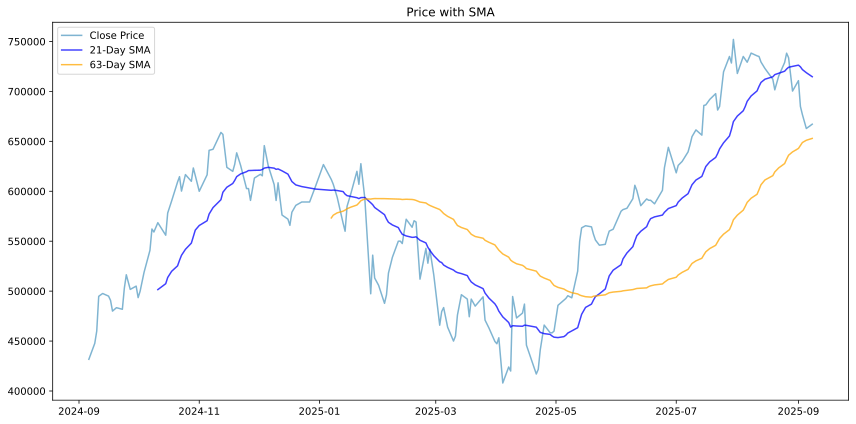

In [25]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df_nvda['close'], label='Close Price', alpha=0.5)
plt.plot(df_nvda['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df_nvda['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

plt.title('Price with SMA')
plt.legend()
plt.show()

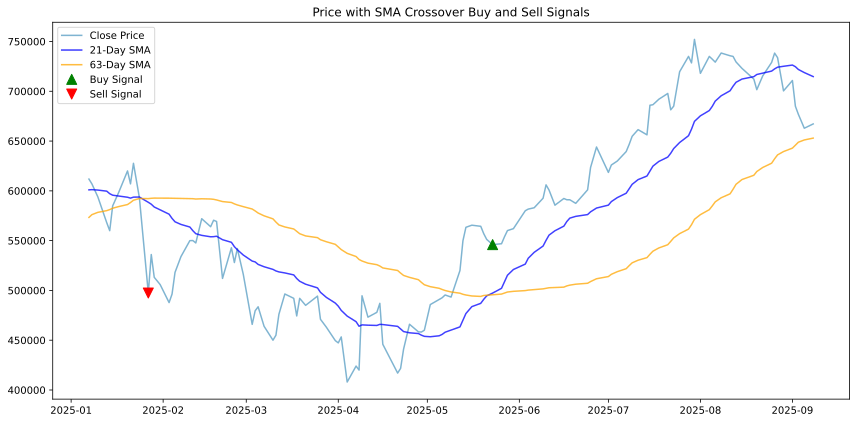

In [ ]:
# Generate Buy and Sell signals
df_nvda['Buy_Signal'] = np.where((df_nvda['SMA_21'] > df_nvda['SMA_63']) & (df_nvda['SMA_21'].shift(1) <= df_nvda['SMA_63'].shift(1)), 1, 0)
df_nvda['Sell_Signal'] = np.where((df_nvda['SMA_21'] < df_nvda['SMA_63']) & (df_nvda['SMA_21'].shift(1) >= df_nvda['SMA_63'].shift(1)), -1, 0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df_nvda['close'], label='Close Price', alpha=0.5)
plt.plot(df_nvda['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df_nvda['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

# Plot Buy Signals
plt.plot(df_nvda[df_nvda['Buy_Signal'] == 1].index, df_nvda['close'][df_nvda['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell Signals
plt.plot(df_nvda[df_nvda['Sell_Signal'] == -1].index, df_nvda['close'][df_nvda['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Price with SMA Crossover Buy and Sell Signals')
plt.legend()
plt.show()

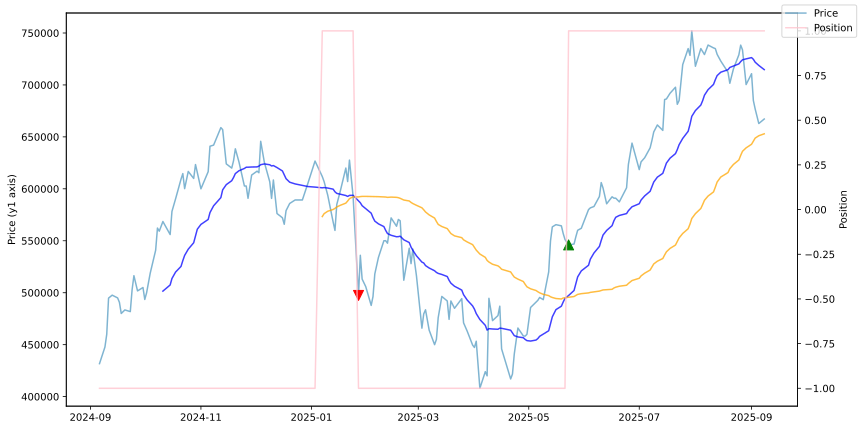

In [28]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator

df_nvda['position'] = np.where((df_nvda['SMA_21'] > df_nvda['SMA_63']),  1,
                             -1) 

fig,ax1 = plt.subplots(figsize=(12, 6))
l1, = ax1.plot(df_nvda.index, df_nvda['close'], label='Close Price', alpha=0.5) #Your Price field
ax1.set_ylabel('Price (y1 axis)')
ax1.plot(df_nvda['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
ax1.plot(df_nvda['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')
ax1.plot(df_nvda[df_nvda['Buy_Signal'] == 1].index, df_nvda['close'][df_nvda['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
ax1.plot(df_nvda[df_nvda['Sell_Signal'] == -1].index, df_nvda['close'][df_nvda['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')


ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df_nvda.index,df_nvda['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

In [ ]:
df_nvda['Returns'] = np.log(df_nvda['close'] / df_nvda['close'].shift(1))
df_nvda['Strategy'] = df_nvda['position'].shift(1) * df_nvda['Returns']  
df_nvda.round(4).head()
df_nvda = df_nvda.dropna(how='all')
df_nvda.dropna(inplace=True)
np.exp(df_nvda[['Returns', 'Strategy']].sum())

In [32]:
df_nvda[['Returns', 'Strategy']].std() * 252 ** 0.5


NVDA
Returns     0.607223
Strategy    0.607201
dtype: float64

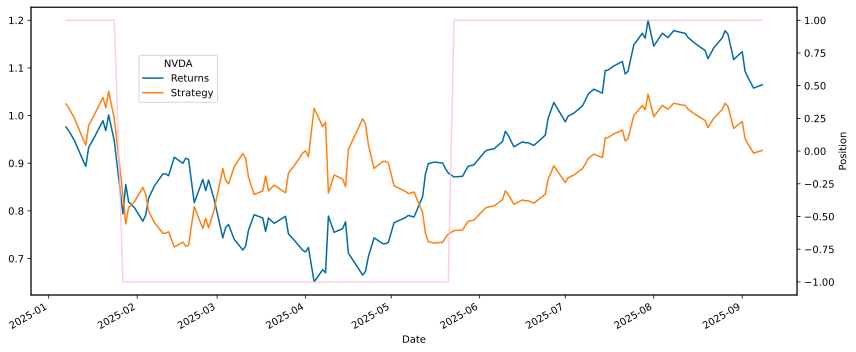

In [33]:
ax1 = df_nvda[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(12,5))

ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df_nvda.index,df_nvda['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

ax1.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');

## Markowitz

In [35]:
from datafromsource import DataFromSource

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv
from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
import math
from datetime import datetime, timedelta
import pandas_datareader.data as web
import datetime as dt

In [36]:
portfolio = [
    'JPM','RY.TO','8058.T','BA','LMT',
    'NVDA','MSFT.O','SAND.K','VLO'
]

In [40]:
from portfoliodata import PortfolioData
portfolio = PortfolioData(portfolio, interval_period="1W", initial = 365*5)
weekly_returns = portfolio.get_portfolio_returns()
weekly_returns

TypeError: 'PortfolioData' object is not subscriptable